We will be scraping a wikipedia page to create a dataframe and visualizing it. This wikipedia page is the list of top soccer international men's goalscorers.

In [102]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Imported different libraries for data analysis, to handle requests and to parse HTML documents.

In [103]:
wikiurl="https://en.wikipedia.org/wiki/List_of_top_international_men%27s_football_goal_scorers_by_country"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

This gets the response in the form of HTML.

In [104]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

This parses data into a beautifulsoup object

In [105]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

   Rank             Player    Country  Goals  Caps  Ratio       First cap  \
0     1  Cristiano Ronaldo   Portugal    123   201   0.62  20 August 2003   
1     2       Ali Daei [a]       Iran    108   148   0.73     6 June 1993   
2     3       Lionel Messi  Argentina    104   176   0.59  17 August 2005   
3     4      Sunil Chhetri      India     92   142   0.65    12 June 2005   
4     5     Mokhtar Dahari   Malaysia     89   142   0.63     5 June 1972   

           Last cap Ref.  
0  8 September 2023  [1]  
1      21 June 2006  [2]  
2  7 September 2023  [3]  
3       4 July 2023  [4]  
4       19 May 1985  [5]  


This converts list to dataframe and print the head of that dataframe.

In [106]:
df.to_json("International_Men_Soccer_Goalscorers_Raw_Data.json")

Save the raw data into a JSON file.

In [107]:
data = df.drop(["Last cap", "First cap", "Ref."], axis=1)
print(data.head())

   Rank             Player    Country  Goals  Caps  Ratio
0     1  Cristiano Ronaldo   Portugal    123   201   0.62
1     2       Ali Daei [a]       Iran    108   148   0.73
2     3       Lionel Messi  Argentina    104   176   0.59
3     4      Sunil Chhetri      India     92   142   0.65
4     5     Mokhtar Dahari   Malaysia     89   142   0.63


Removed unwanted columns from the dataframe.

In [108]:
number_of_duplicates = data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

data = data.drop_duplicates()

number_of_duplicates = data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


Duplication checks and cleaning of duplicates.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     233 non-null    int64  
 1   Player   233 non-null    object 
 2   Country  233 non-null    object 
 3   Goals    233 non-null    int64  
 4   Caps     233 non-null    int64  
 5   Ratio    233 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 12.7+ KB


Inspecting data and checking noisy entries

In [110]:
data = data.dropna()
data

,Rank,Player,Country,Goals,Caps,Ratio
0,1,Cristiano Ronaldo,Portugal,123,201,0.62
1,2,Ali Daei [a],Iran,108,148,0.73
2,3,Lionel Messi,Argentina,104,176,0.59
3,4,Sunil Chhetri,India,92,142,0.65
4,5,Mokhtar Dahari,Malaysia,89,142,0.63
...,...,...,...,...,...,...
228,205,Liam Walker [i],Gibraltar,5,72,0.07
229,209,Abdullahi Sheikh Mohamed,Somalia,3,6,0.50
230,209,Jamie Browne,U.S. Virgin Islands,3,11,0.27
231,209,J. C. Mack,U.S. Virgin Islands,3,15,0.20


Dropping rows will null entries.

In [111]:
data.to_csv("International_Men_Soccer_Goalscorers.csv")

Loading the dataframe into a CSV file.

In [112]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


Importing all libraries needed for visualization

In [113]:
data["Ratio"].describe()

count    233.000000
mean       0.451803
std        0.194666
min        0.070000
25%        0.320000
50%        0.430000
75%        0.550000
max        1.500000
Name: Ratio, dtype: float64

This describes the code of the ratio column and give various mathematical averages. In this summary, we can see that the datatype of the column being float. Out of the 233 rows, the mean of the ratio of goals scored to matches played is 0.45, while the median is 0.43, which means that there are not many outliers that affect the accuracy of the data. The minimum is 0.07 goals per game while the maximum is 1.5 goals per game which means that although there are not many outliers which affect the mean, the dataframe is still not void of them.

Text(0.5, 1.0, 'Goals by Appearance')

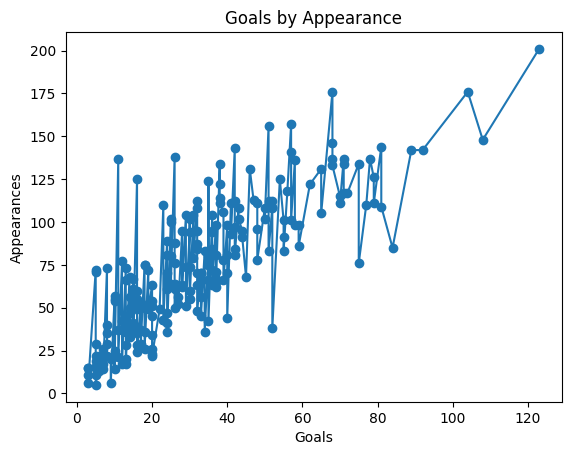

In [114]:
goals = data["Goals"]
caps = data["Caps"]

plt.plot(goals, caps, marker='o')

plt.ylabel("Appearances")
plt.xlabel("Goals")

plt.title("Goals by Appearance")

The informative graph above plots the total goals scored by the player against the appearances made by a player. In this case, we can see that there is a positive correlation between the two variables as we can see that the general trend of the graph is that the more appearances a player makes, the more goals he scores. There are number of outliers, and not all players follow this rule but the general conclusion is that as appearances increase, the number of goals scored increases.